[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gerberlab/MDSINE2_Paper/blob/master/google_colab/tutorial1_raw_data_visualization.ipynb)

# Preprocessed data visualization
This notebook will show you how to visualize the pre-processed data and perform some of the preliminary filtering. This goes beyond what someone will need to do in order to simply run MDSINE2 on their own data. The data has been generated from raw sequences following https://github.com/gerberlab/MDSINE2_Paper/blob/master/analysis/internal_doc_for_manual_steps.md

To see how to run MDSINE2 go to the next tutorial `tutorial2_inference.ipynb` in the same github repo

In [1]:
!git clone https://github.com/gerberlab/MDSINE2_Paper
!git clone https://github.com/gerberlab/MDSINE2
!pip install MDSINE2/.

fatal: destination path 'MDSINE2_Paper' already exists and is not an empty directory.
fatal: destination path 'MDSINE2' already exists and is not an empty directory.
Processing ./MDSINE2
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for mdsine2: filename=mdsine2-0.4.5-cp37-cp37m-linux_x86_64.whl size=331210 sha256=979c64fe839fc6a129c9f0fe9bbcaf23ddc0674a7e58c5a5243838c5748d70ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-5mclthrc/wheels/b7/19/91/a6396303d26cbb96faa55fdede89eb0dbe3c598d2306ddb8b8
Successfully built mdsine2
  Attempting uninstall: mdsine2
    Found existing installation: mdsine2 0.4.5
    Uninstalling mdsi

**On Google Colab**: Make sure to restart the runtime before proceeding, so that the mdsine2 package is recognized.

In [2]:
%matplotlib inline

import mdsine2 as md2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from IPython.display import IFrame


In [3]:
# Loading in the preprocessed healthy and dysbiotic (Ulceratibe Colitis) pickle files
healthy = md2.Study.load('MDSINE2_Paper/analysis/output/gibson/preprocessed/gibson_healthy_agg_taxa.pkl')
uc = md2.Study.load('MDSINE2_Paper/analysis/output/gibson/preprocessed/gibson_uc_agg_taxa.pkl')

In [4]:
# These data structures contain the qPCR, reads, perturbations, and metadata for each longitudinal cohort. For instance we can print the subjects and perurbation metadata as follows
print('Healthy')
for subj in healthy:
    print(subj.name)
for perturbation in healthy.perturbations:
    print(perturbation)
print('Ulcerative Colitis')
for subj in uc:
    print(subj.name)
for perturbation in uc.perturbations:
    print(perturbation)


Healthy
2
3
4
5
Perturbation High Fat Diet:
	Subject 2: (21.5, 28.5)
	Subject 3: (21.5, 28.5)
	Subject 4: (21.5, 28.5)
	Subject 5: (21.5, 28.5)

Perturbation Vancomycin:
	Subject 2: (35.5, 42.5)
	Subject 3: (35.5, 42.5)
	Subject 4: (35.5, 42.5)
	Subject 5: (35.5, 42.5)

Perturbation Gentamicin:
	Subject 2: (50.5, 57.5)
	Subject 3: (50.5, 57.5)
	Subject 4: (50.5, 57.5)
	Subject 5: (50.5, 57.5)

Ulcerative Colitis
10
6
7
8
9
Perturbation High Fat Diet:
	Subject 6: (21.5, 28.5)
	Subject 7: (21.5, 28.5)
	Subject 8: (21.5, 28.5)
	Subject 9: (21.5, 28.5)
	Subject 10: (21.5, 28.5)

Perturbation Vancomycin:
	Subject 6: (35.5, 42.5)
	Subject 7: (35.5, 42.5)
	Subject 8: (35.5, 42.5)
	Subject 9: (35.5, 42.5)
	Subject 10: (35.5, 42.5)

Perturbation Gentamicin:
	Subject 6: (50.5, 57.5)
	Subject 7: (50.5, 57.5)
	Subject 8: (50.5, 57.5)
	Subject 9: (50.5, 57.5)
	Subject 10: (50.5, 57.5)



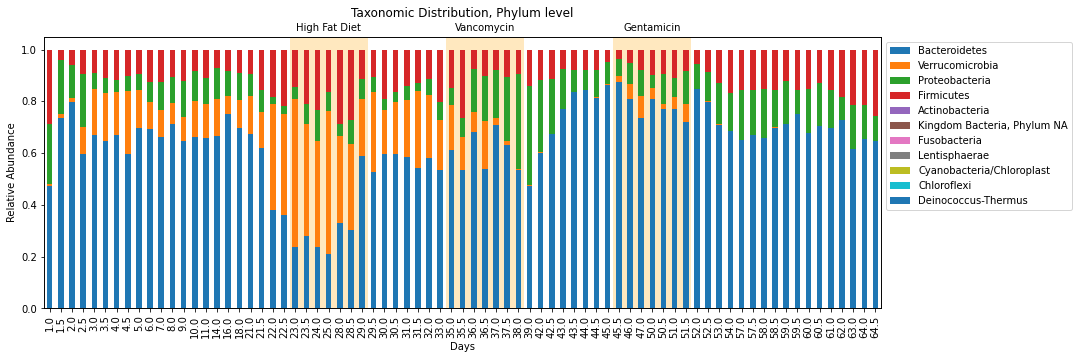

In [5]:
# Plot the taxa abundances at the phylum level for subject `2`
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
md2.visualization.taxonomic_distribution_over_time(healthy['2'], taxlevel='phylum', label_formatter='%(phylum)s', ax=ax)
plt.show()

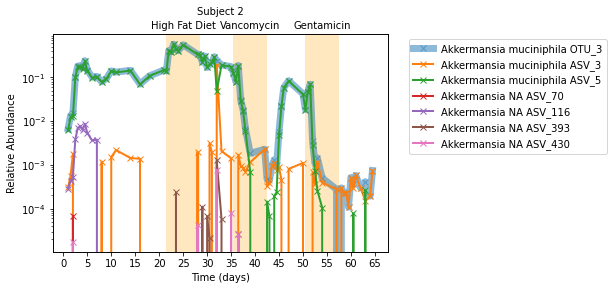

In [6]:
# Visualize the aggregate ASVs collapsed for any OTU in the study
ax = md2.visualization.aggregate_taxa_abundances(subj=healthy['2'], agg=healthy.taxa['OTU_3'])
plt.show()
# We have a script that does this over every subject for every OTU. Run the bash command `./../gibson_dataset/plot_aggregates.sh`

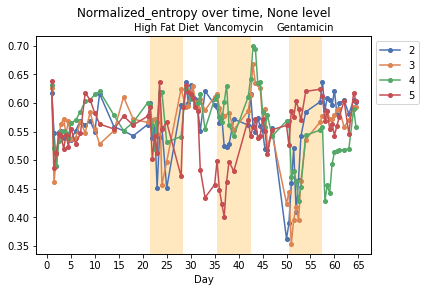

In [7]:
# Alpha diversity
md2.visualization.alpha_diversity_over_time([subj for subj in healthy], 
    metric=md2.diversity.alpha.normalized_entropy)
plt.show()

In [8]:
# Filtering
# Use consistency filtering
print('Number of OTUs before', len(healthy.taxa))
healthy_filt = md2.consistency_filtering(healthy, dtype='rel',
    threshold=0.0001,
    min_num_consecutive=7,
    min_num_subjects=2,
    colonization_time=5)
print('Number of OTUs after', len(healthy_filt.taxa))

Number of OTUs before 1224
Number of OTUs after 113


# Run scripts
These scripts mirror the shell scripts we ran for our paper but are modifed to be shorter runs than what is done in the actual scripts.

In [8]:
# Assign taxonomy to consensus sequences for each OTU
# This is called in the script MDSINE2_Paper/gibson_dataset/preprocess_assign_consensus_taxonomy.sh
!python MDSINE2_Paper/analysis/helpers/assign_taxonomy_for_consensus_seqs.py \
    --rdp-table MDSINE2_Paper/analysis/files/assign_taxonomy_OTUs/taxonomy_RDP.txt \
    --confidence-threshold 50 \
    --output-basepath MDSINE2_Paper/analysis/output/gibson/preprocessed

2021-12-15 19:45:51,953 [INFO] [assign_taxonomy_for_consensus_seqs.py (87)] - Parsing RDP
2021-12-15 19:45:51,964 [INFO] [assign_taxonomy_for_consensus_seqs.py (91)] - Replacing healthy
OTU_42 taxonomy does not agree
OTU
	id: 2508642718496
	idx: 41
	name: OTU_42
	Aggregates: ['ASV_52', 'ASV_57', 'ASV_84', 'ASV_153', 'ASV_155']
	taxonomy:
		kingdom: Bacteria
		phylum: Firmicutes
		class: Clostridia
		order: Clostridiales
		family: Lachnospiraceae
		genus: NA
		species: NA
OTU_66 taxonomy does not agree
OTU
	id: 2508642720008
	idx: 65
	name: OTU_66
	Aggregates: ['ASV_88', 'ASV_121']
	taxonomy:
		kingdom: Bacteria
		phylum: Firmicutes
		class: Clostridia
		order: Clostridiales
		family: Lachnospiraceae
		genus: Enterocloster
		species: NA
OTU_85 taxonomy does not agree
OTU
	id: 2508643084720
	idx: 84
	name: OTU_85
	Aggregates: ['ASV_115', 'ASV_124']
	taxonomy:
		kingdom: Bacteria
		phylum: Firmicutes
		class: Clostridia
		order: Clostridiales
		family: Ruminococcaceae
		genus: Fournierell

In [9]:
# plot the OTU trajectories with each ASV shown
# Takes approximately <1 minute to plot everything in this cell
# This is called in the script MDSINE2_Paper/gibson_dataset/plot_aggregates.sh
# This produces a folder in MDSINE2_Paper/output/aggregate_plots
!python MDSINE2_Paper/analysis/helpers/plot_otus.py \
    --study MDSINE2_Paper/analysis/output/gibson/preprocessed/gibson_healthy_agg_taxa.pkl \
    --output-basepath MDSINE2_Paper/analysis/output/gibson/plots/aggregate_plots/ \
    --top 10
!python MDSINE2_Paper/analysis/helpers/plot_otus.py \
    --study MDSINE2_Paper/analysis/output/gibson/preprocessed/gibson_uc_agg_taxa.pkl \
    --output-basepath MDSINE2_Paper/analysis/output/gibson/plots/aggregate_plots/ \
    --top 10

2021-12-15 19:45:58,360 [INFO] [plot_otus.py (34)] - Subject 2
2021-12-15 19:45:58,360 [INFO] [plot_otus.py (40)] - taxon 0/1224
2021-12-15 19:45:59,290 [INFO] [plot_otus.py (40)] - taxon 1/1224
2021-12-15 19:46:00,151 [INFO] [plot_otus.py (40)] - taxon 2/1224
2021-12-15 19:46:00,945 [INFO] [plot_otus.py (40)] - taxon 3/1224
2021-12-15 19:46:01,625 [INFO] [plot_otus.py (40)] - taxon 4/1224
2021-12-15 19:46:02,363 [INFO] [plot_otus.py (40)] - taxon 5/1224
2021-12-15 19:46:03,149 [INFO] [plot_otus.py (40)] - taxon 6/1224
2021-12-15 19:46:03,850 [INFO] [plot_otus.py (40)] - taxon 7/1224
2021-12-15 19:46:04,508 [INFO] [plot_otus.py (40)] - taxon 8/1224
2021-12-15 19:46:05,141 [INFO] [plot_otus.py (40)] - taxon 9/1224
2021-12-15 19:46:05,986 [INFO] [plot_otus.py (34)] - Subject 3
2021-12-15 19:46:05,986 [INFO] [plot_otus.py (40)] - taxon 0/1224
2021-12-15 19:46:06,671 [INFO] [plot_otus.py (40)] - taxon 1/1224
2021-12-15 19:46:07,409 [INFO] [plot_otus.py (40)] - taxon 2/1224
2021-12-15 19:46

In [10]:
# Lets see what files were just created for Healthy subject 2
import os
path='./MDSINE2_Paper/analysis/output/gibson/plots/aggregate_plots/healthy/Subject 2'
os.listdir(path)

['OTU_2.pdf',
 'OTU_3.pdf',
 'OTU_4.pdf',
 'OTU_8.pdf',
 'OTU_9.pdf',
 'OTU_1.pdf',
 'OTU_7.pdf',
 'OTU_10.pdf',
 'OTU_6.pdf',
 'OTU_5.pdf']

In [ ]:
#Lets look at OTU 3 in Healthy subject 2
path = './MDSINE2_Paper/analysis/output/gibson/plots/aggregate_plots/healthy/Subject 2/OTU_3.pdf'
from google.colab import files
files.download(path)

In [12]:
# Filter the OTUs using consistency filtering
# This is called in the script MDSINE2_Paper/gibson_dataset/preprocessing_filtering.sh
!mdsine2 filter \
    --dataset MDSINE2_Paper/analysis/output/gibson/preprocessed/gibson_healthy_agg_taxa.pkl \
    --outfile MDSINE2_Paper/analysis/output/gibson/preprocessed/gibson_healthy_agg_taxa_filtered.pkl \
    --dtype rel \
    --threshold 0.0001 \
    --min-num-consecutive 7 \
    --min-num-subjects 2 \
    --colonization-time 5
!mdsine2 filter \
    --dataset MDSINE2_Paper/analysis/output/gibson/preprocessed/gibson_uc_agg_taxa.pkl \
    --outfile MDSINE2_Paper/analysis/output/gibson/preprocessed/gibson_uc_agg_taxa_filtered.pkl \
    --dtype rel \
    --threshold 0.0001 \
    --min-num-consecutive 7 \
    --min-num-subjects 2 \
    --colonization-time 5


2021-12-15 19:47:11,445 [INFO] [taxa_filter.py (86)] - 113 taxa left in healthy
2021-12-15 19:47:17,670 [INFO] [taxa_filter.py (86)] - 94 taxa left in uc


In [13]:
# NOTE QT is really buggy!!! Script runs, but figures may not be made in the cloud!!!
# plot subtrees
# This takes approximately 1.5 minutes
# This is called in the script MDSINE2_Paper/gibson_dataset/plot_phylogenetic_subtrees.sh
# This produces a folder in MDSINE2_Paper/output/subtrees
!python MDSINE2_Paper/analysis/helpers/plot_phylogenetic_subtrees.py \
    --study MDSINE2_Paper/analysis/output/gibson/preprocessed/gibson_healthy_agg_taxa.pkl \
    --output-basepath MDSINE2_Paper/analysis/output/gibson/phylogeny/ \
    --tree MDSINE2_Paper/analysis/files/phylogenetic_placement_OTUs/phylogenetic_tree_full_taxid.nhx \
    --seq-info MDSINE2_Paper/analysis/files/subtrees/RDP-11-5_BA_TS_info.tsv \
    --sep \t \
    --family-radius-factor 1.5 \
    --top 20

2021-12-15 19:47:22,424 [INFO] [plot_phylogenetic_subtrees.py (39)] - Making distance matrix (this may take a minute)
2021-12-15 19:49:27,510 [INFO] [plot_phylogenetic_subtrees.py (46)] - Read sequence info file
2021-12-15 19:49:27,543 [INFO] [plot_phylogenetic_subtrees.py (49)] - get families of reference seqs
2021-12-15 19:49:27,647 [INFO] [plot_phylogenetic_subtrees.py (68)] - 0/1224 - nan
family is not defined for OTU_48
family is not defined for OTU_71
family is not defined for OTU_88
2021-12-15 19:49:27,747 [INFO] [plot_phylogenetic_subtrees.py (68)] - 100/1224 - 0.6096580723567278
family is not defined for OTU_151
family is not defined for OTU_152
family is not defined for OTU_159
family is not defined for OTU_164
family is not defined for OTU_167
2021-12-15 19:49:27,855 [INFO] [plot_phylogenetic_subtrees.py (68)] - 200/1224 - 0.621202761478475
family is not defined for OTU_201
family is not defined for OTU_213
family is not defined for OTU_230
family is not defined for OTU_235
